In [ ]:

pip install pandas


In [ ]:
# Imports
# Numpy,Pandas
import numpy as np
import pandas as pd
import datetime

# matplotlib,seaborn,pyecharts
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler


#  忽略弹出的warnings
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.float_format', lambda x: '%.4f' % x)


In [ ]:
data = pd.read_csv('/content/creditcard.csv')
print(data.shape)
data.head()

(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0000,-1.3598,-0.0728,2.5363,1.3782,-0.3383,0.4624,0.2396,0.0987,0.3638,...,-0.0183,0.2778,-0.1105,0.0669,0.1285,-0.1891,0.1336,-0.0211,149.6200,0
1,0.0000,1.1919,0.2662,0.1665,0.4482,0.0600,-0.0824,-0.0788,0.0851,-0.2554,...,-0.2258,-0.6387,0.1013,-0.3398,0.1672,0.1259,-0.0090,0.0147,2.6900,0
2,1.0000,-1.3584,-1.3402,1.7732,0.3798,-0.5032,1.8005,0.7915,0.2477,-1.5147,...,0.2480,0.7717,0.9094,-0.6893,-0.3276,-0.1391,-0.0554,-0.0598,378.6600,0
3,1.0000,-0.9663,-0.1852,1.7930,-0.8633,-0.0103,1.2472,0.2376,0.3774,-1.3870,...,-0.1083,0.0053,-0.1903,-1.1756,0.6474,-0.2219,0.0627,0.0615,123.5000,0
4,2.0000,-1.1582,0.8777,1.5487,0.4030,-0.4072,0.0959,0.5929,-0.2705,0.8177,...,-0.0094,0.7983,-0.1375,0.1413,-0.2060,0.5023,0.2194,0.2152,69.9900,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
data['Hour'] = data['Time'].apply(lambda x: divmod(x, 3600)[0])
data.sample(5)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Hour
174194,121814.0000,2.0015,-0.7512,-0.7161,-1.6879,-0.6751,-0.4845,-0.6780,0.0782,1.8539,...,-0.1522,0.3786,0.6857,-0.4627,-0.5754,0.0209,-0.0391,14.6000,0,33.0000
255681,157347.0000,2.2727,-1.4189,-1.0256,-1.6532,-1.1772,-0.5098,-1.1512,-0.0810,-1.3686,...,0.0617,0.1885,-0.4563,-0.1893,-0.1510,0.0034,-0.0671,15.0000,0,43.0000
86328,61181.0000,-3.0718,1.1294,-0.2951,-0.2717,-0.3186,-0.2935,-0.2219,1.1794,-0.8071,...,-0.4127,0.2027,-0.3315,-0.4098,-0.1556,-1.3449,-0.6598,0.4100,0,16.0000
283606,171725.0000,-3.2363,3.4343,-3.3339,-0.6111,-0.6626,-0.6808,-1.2011,2.3770,-0.5516,...,0.9338,-0.0191,-1.2202,-0.0499,-0.1150,-0.4917,0.0731,4.3600,0,47.0000
138359,82615.0000,1.3364,0.0613,-1.7635,-0.5390,2.4355,2.9647,-0.0798,0.6253,-0.3653,...,-0.3459,-0.1559,1.0492,0.8451,0.4437,-0.0639,-0.0048,13.9100,0,22.0000


In [ ]:
data.columns


Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class', 'Hour'],
      dtype='object')

In [ ]:
x_feature = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount','Hour']

X = data[x_feature]
y = data["Class"]


In [ ]:

# Check for missing values
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values)



Missing values in each column:
 Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
Hour      0
dtype: int64


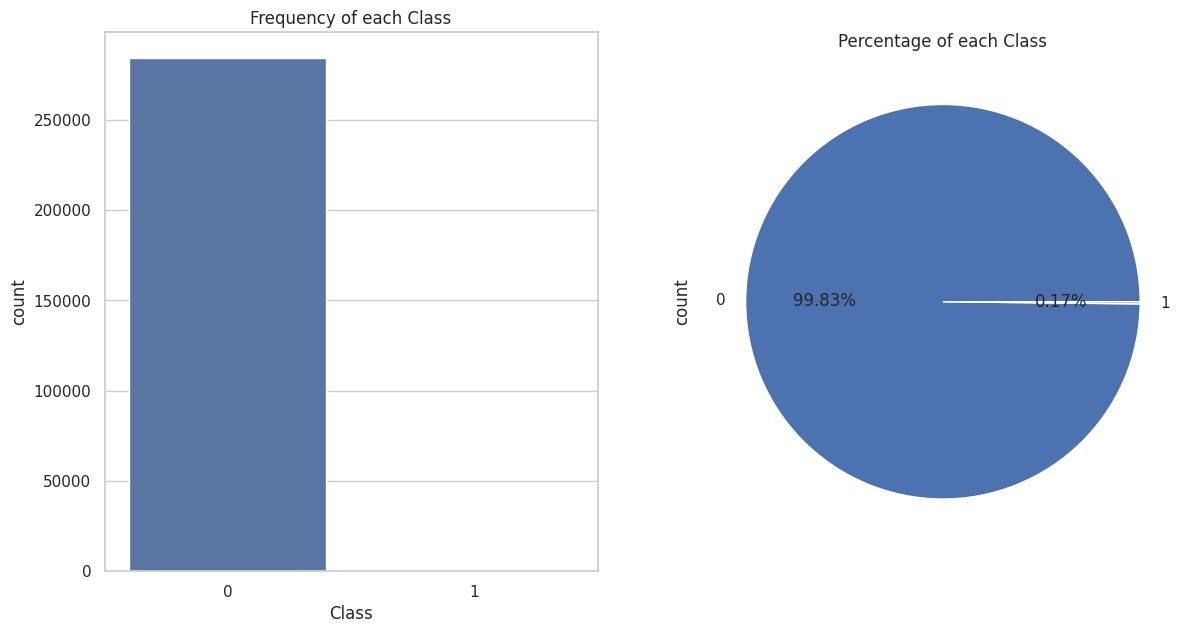

In [ ]:
# Target variable distribution visualization
fig, axs = plt.subplots(1,2,figsize=(14,7))
## Bar Chart
sns.countplot(x='Class',data=data,ax=axs[0])
axs[0].set_title("Frequency of each Class")

## Pie chart
data['Class'].value_counts().plot(x=None,y=None, kind='pie', ax=axs[1],autopct='%1.2f%%')
axs[1].set_title("Percentage of each Class")
plt.show()


In [ ]:
# Get data
fraud = data[data['Class'] == 1]
nonFraud = data[data['Class'] == 0]

# Correlation calculation
correlationNonFraud = nonFraud.loc[:, data.columns != 'Class'].corr()
correlationFraud = fraud.loc[:, data.columns != 'Class'].corr()

mask = np.zeros_like(correlationNonFraud)
indices = np.triu_indices_from(correlationNonFraud)
mask[indices] = True



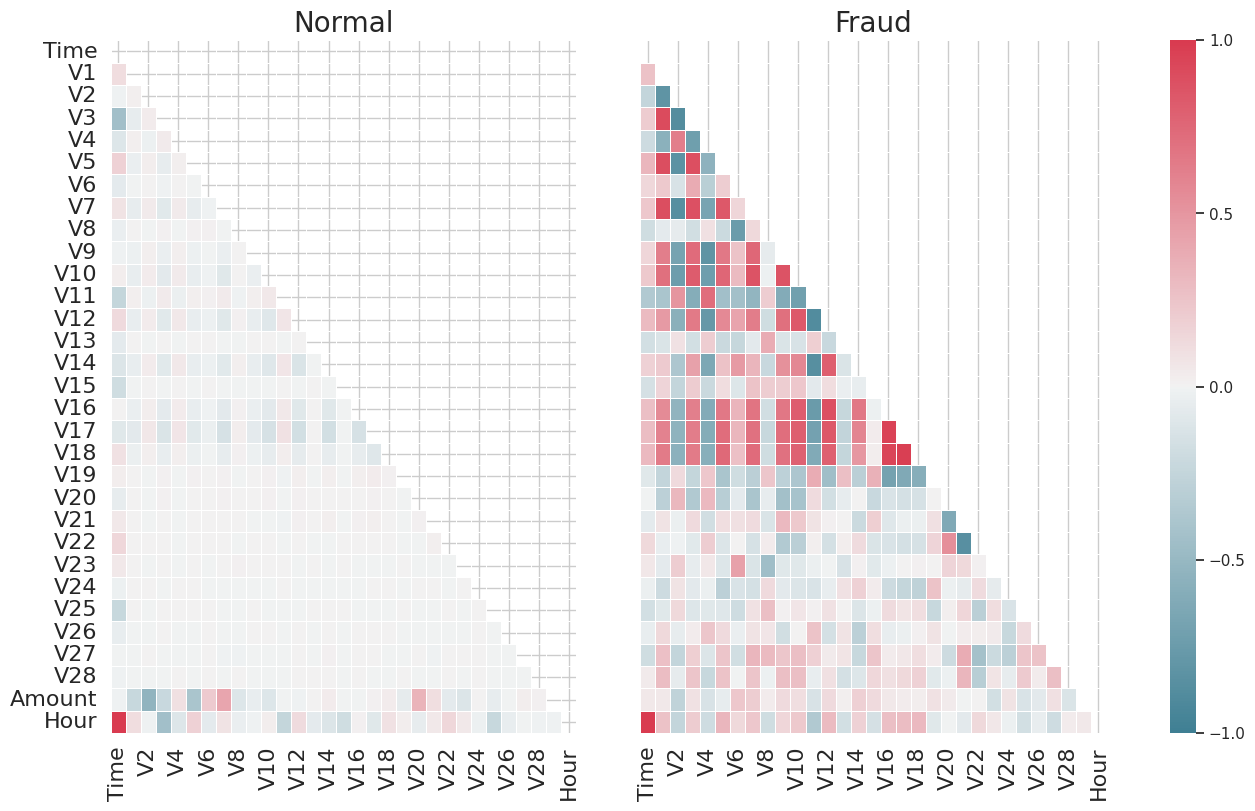

In [ ]:
grid_kws = {"width_ratios": (.9, .9, .05), "wspace": 0.2}
f, (ax1, ax2, cbar_ax) = plt.subplots(1, 3, gridspec_kw=grid_kws, figsize = (14, 9))

# Normal user-feature correlation display
cmap = sns.diverging_palette(220, 8, as_cmap=True)
ax1 =sns.heatmap(correlationNonFraud, ax = ax1, vmin = -1, vmax = 1, \
    cmap = cmap, square = False, linewidths = 0.5, mask = mask, cbar = False)
ax1.set_xticklabels(ax1.get_xticklabels(), size = 16);
ax1.set_yticklabels(ax1.get_yticklabels(), size = 16);
ax1.set_title('Normal', size = 20)

# Defrauded user-feature correlation display
ax2 = sns.heatmap(correlationFraud, vmin = -1, vmax = 1, cmap = cmap, \
ax = ax2, square = False, linewidths = 0.5, mask = mask, yticklabels = False, \
    cbar_ax = cbar_ax, cbar_kws={'orientation': 'vertical', \
                                 'ticks': [-1, -0.5, 0, 0.5, 1]})
ax2.set_xticklabels(ax2.get_xticklabels(), size = 16);
ax2.set_title('Fraud', size = 20);


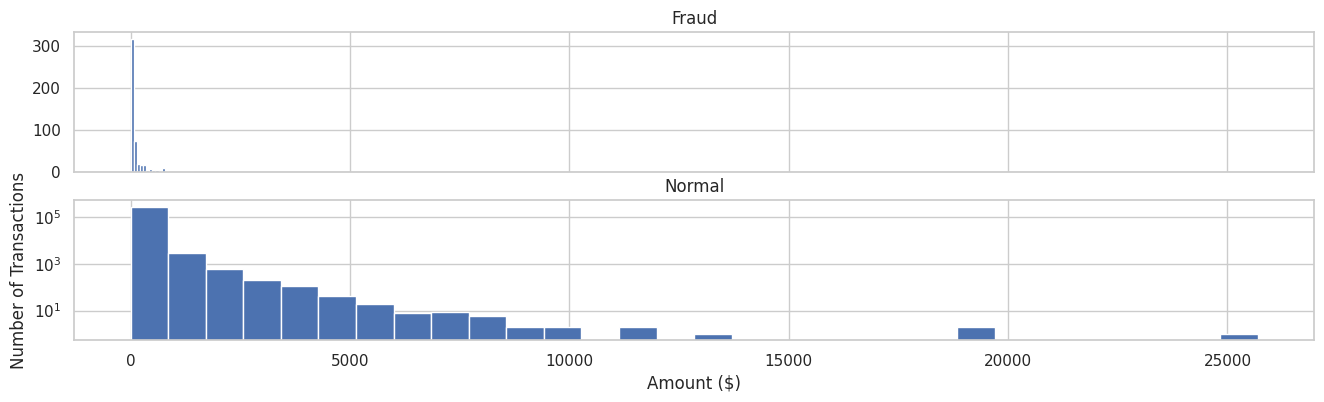

In [ ]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(16,4))
bins = 30
ax1.hist(data["Amount"][data["Class"]== 1], bins = bins)
ax1.set_title('Fraud')

ax2.hist(data["Amount"][data["Class"] == 0], bins = bins)
ax2.set_title('Normal')

plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.yscale('log')
plt.show()


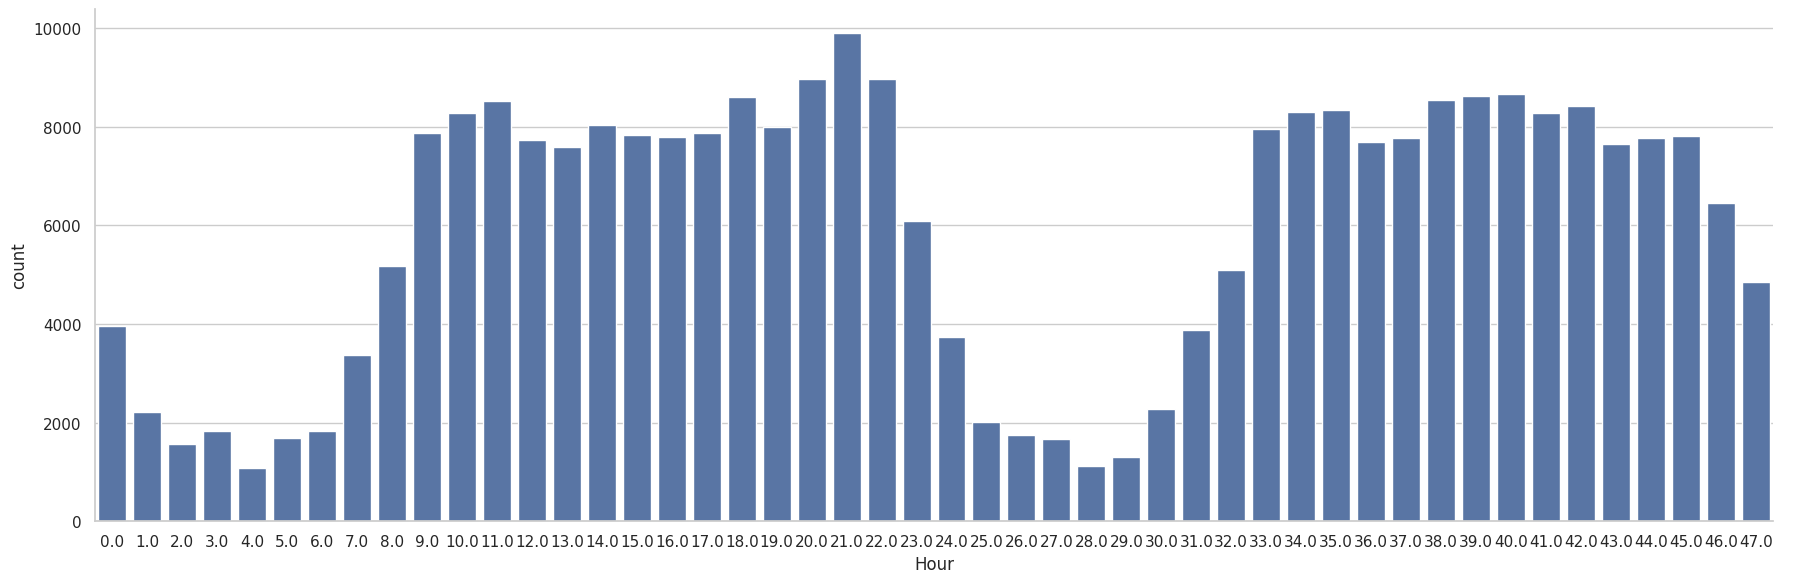

In [ ]:
sns.set(style="whitegrid")

g = sns.catplot(x="Hour", data=data, kind="count", height=6, aspect=3)
g.set_xticklabels(step=1)

plt.show()

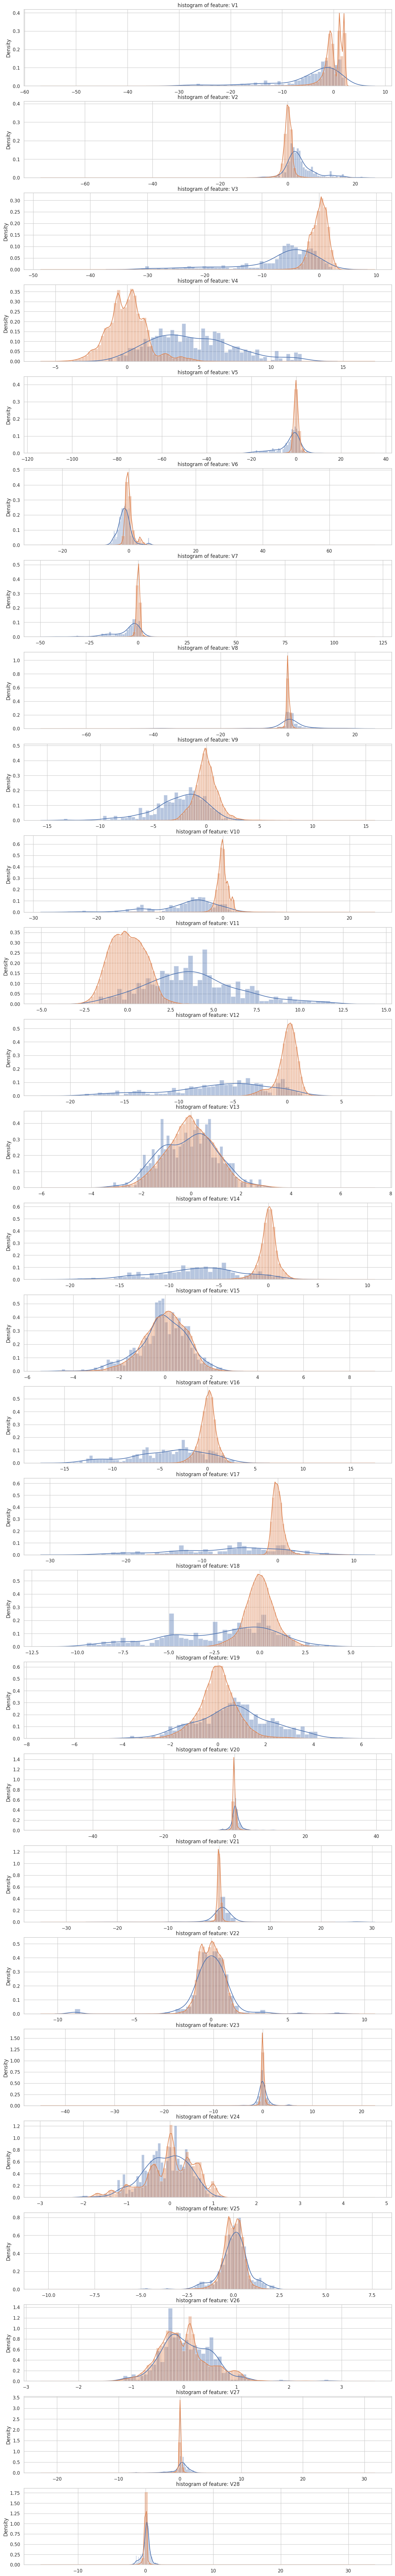

In [ ]:

v_feat_col = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15',
         'V16', 'V17', 'V18', 'V19', 'V20','V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28']
v_feat_col_size = len(v_feat_col)


plt.figure(figsize=(16,v_feat_col_size*4))
gs = gridspec.GridSpec(v_feat_col_size, 1)
for i, cn in enumerate(data[v_feat_col]):
    ax = plt.subplot(gs[i])
    sns.distplot(data[cn][data["Class"] == 1], bins=50)
    sns.distplot(data[cn][data["Class"] == 0], bins=100)
    ax.set_xlabel('')
    ax.set_title('histogram of feature: ' + str(cn))


In [ ]:
data.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Hour
0,0.0000,-1.3598,-0.0728,2.5363,1.3782,-0.3383,0.4624,0.2396,0.0987,0.3638,...,0.2778,-0.1105,0.0669,0.1285,-0.1891,0.1336,-0.0211,149.6200,0,0.0000
1,0.0000,1.1919,0.2662,0.1665,0.4482,0.0600,-0.0824,-0.0788,0.0851,-0.2554,...,-0.6387,0.1013,-0.3398,0.1672,0.1259,-0.0090,0.0147,2.6900,0,0.0000
2,1.0000,-1.3584,-1.3402,1.7732,0.3798,-0.5032,1.8005,0.7915,0.2477,-1.5147,...,0.7717,0.9094,-0.6893,-0.3276,-0.1391,-0.0554,-0.0598,378.6600,0,0.0000
3,1.0000,-0.9663,-0.1852,1.7930,-0.8633,-0.0103,1.2472,0.2376,0.3774,-1.3870,...,0.0053,-0.1903,-1.1756,0.6474,-0.2219,0.0627,0.0615,123.5000,0,0.0000
4,2.0000,-1.1582,0.8777,1.5487,0.4030,-0.4072,0.0959,0.5929,-0.2705,0.8177,...,0.7983,-0.1375,0.1413,-0.2060,0.5023,0.2194,0.2152,69.9900,0,0.0000


In [ ]:
# Delete Time at the same time: keep the Hour field
droplist = ['V8', 'V13', 'V15', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28','Time']
data_new = data.drop(droplist, axis = 1)
print(data_new.shape)
data_new.tail()


(284807, 19)


,V1,V2,V3,V4,V5,V6,V7,V9,V10,V11,V12,V14,V16,V17,V18,V19,Amount,Class,Hour
284802,-11.8811,10.0718,-9.8348,-2.0667,-5.3645,-2.6068,-4.9182,1.9144,4.3562,-1.5931,2.7119,4.6269,1.1076,1.9917,0.5106,-0.6829,0.7700,0,47.0000
284803,-0.7328,-0.0551,2.0350,-0.7386,0.8682,1.0584,0.0243,0.5848,-0.9759,-0.1502,0.9158,-0.6751,-0.7118,-0.0257,-1.2212,-1.5456,24.7900,0,47.0000
284804,1.9196,-0.3013,-3.2496,-0.5578,2.6305,3.0313,-0.2968,0.4325,-0.4848,0.4116,0.0631,-0.5106,0.1407,0.3135,0.3957,-0.5773,67.8800,0,47.0000
284805,-0.2404,0.5305,0.7025,0.6898,-0.3780,0.6237,-0.6862,0.3921,-0.3991,-1.9338,-0.9629,0.4496,-0.6086,0.5099,1.1140,2.8978,10.0000,0,47.0000
284806,-0.5334,-0.1897,0.7033,-0.5063,-0.0125,-0.6496,1.5770,0.4862,-0.9154,-1.0405,-0.0315,-0.0843,-0.3026,-0.6604,0.1674,-0.2561,217.0000,0,47.0000


In [ ]:
# Perform feature scaling on Amount and Hour
col = ['Amount','Hour']
from sklearn.preprocessing import StandardScaler
sc =StandardScaler()
data_new[col] =sc.fit_transform(data_new[col])#Standardize the data
data_new.tail()


,V1,V2,V3,V4,V5,V6,V7,V9,V10,V11,V12,V14,V16,V17,V18,V19,Amount,Class,Hour
284802,-11.8811,10.0718,-9.8348,-2.0667,-5.3645,-2.6068,-4.9182,1.9144,4.3562,-1.5931,2.7119,4.6269,1.1076,1.9917,0.5106,-0.6829,-0.3502,0,1.6044
284803,-0.7328,-0.0551,2.0350,-0.7386,0.8682,1.0584,0.0243,0.5848,-0.9759,-0.1502,0.9158,-0.6751,-0.7118,-0.0257,-1.2212,-1.5456,-0.2541,0,1.6044
284804,1.9196,-0.3013,-3.2496,-0.5578,2.6305,3.0313,-0.2968,0.4325,-0.4848,0.4116,0.0631,-0.5106,0.1407,0.3135,0.3957,-0.5773,-0.0818,0,1.6044
284805,-0.2404,0.5305,0.7025,0.6898,-0.3780,0.6237,-0.6862,0.3921,-0.3991,-1.9338,-0.9629,0.4496,-0.6086,0.5099,1.1140,2.8978,-0.3132,0,1.6044
284806,-0.5334,-0.1897,0.7033,-0.5063,-0.0125,-0.6496,1.5770,0.4862,-0.9154,-1.0405,-0.0315,-0.0843,-0.3026,-0.6604,0.1674,-0.2561,0.5144,0,1.6044


In [ ]:
data_new.describe().T


,count,mean,std,min,25%,50%,75%,max
V1,284807.0000,0.0000,1.9587,-56.4075,-0.9204,0.0181,1.3156,2.4549
V2,284807.0000,0.0000,1.6513,-72.7157,-0.5985,0.0655,0.8037,22.0577
V3,284807.0000,-0.0000,1.5163,-48.3256,-0.8904,0.1798,1.0272,9.3826
V4,284807.0000,0.0000,1.4159,-5.6832,-0.8486,-0.0198,0.7433,16.8753
V5,284807.0000,0.0000,1.3802,-113.7433,-0.6916,-0.0543,0.6119,34.8017
V6,284807.0000,0.0000,1.3323,-26.1605,-0.7683,-0.2742,0.3986,73.3016
V7,284807.0000,-0.0000,1.2371,-43.5572,-0.5541,0.0401,0.5704,120.5895
V9,284807.0000,-0.0000,1.0986,-13.4341,-0.6431,-0.0514,0.5971,15.5950
V10,284807.0000,0.0000,1.0888,-24.5883,-0.5354,-0.0929,0.4539,23.7451
V11,284807.0000,0.0000,1.0207,-4.7975,-0.7625,-0.0328,0.7396,12.0189


In [ ]:
x_feature = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V9', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17', 'V18', 'V19', 'Amount',  'Hour']
x_val = data_new[x_feature]
y_val = data_new['Class']


In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=10,random_state=123,max_depth=4)#Building a Random Forest Classifier for Classification
clf.fit(x_val, y_val)

RandomForestClassifier(max_depth=4, n_estimators=10, random_state=123)

In [ ]:
for feature in zip(x_feature,clf.feature_importances_):
    print(feature)


('V1', 0.0008826091438778425)
('V2', 0.0021058185061093608)
('V3', 0.009750867340434583)
('V4', 0.01751094043420745)
('V5', 0.008600547467227002)
('V6', 0.013298075656335426)
('V7', 0.0086835897086001)
('V9', 0.023090145788325165)
('V10', 0.08528888657921369)
('V11', 0.06537921978883558)
('V12', 0.14194613523236163)
('V14', 0.13109127164220205)
('V16', 0.19729822871872432)
('V17', 0.27966491161168533)
('V18', 0.009405287105749225)
('V19', 0.0002669771829968763)
('Amount', 0.0017493348363684953)
('Hour', 0.003987153256745854)


(-1.0, 18.0)

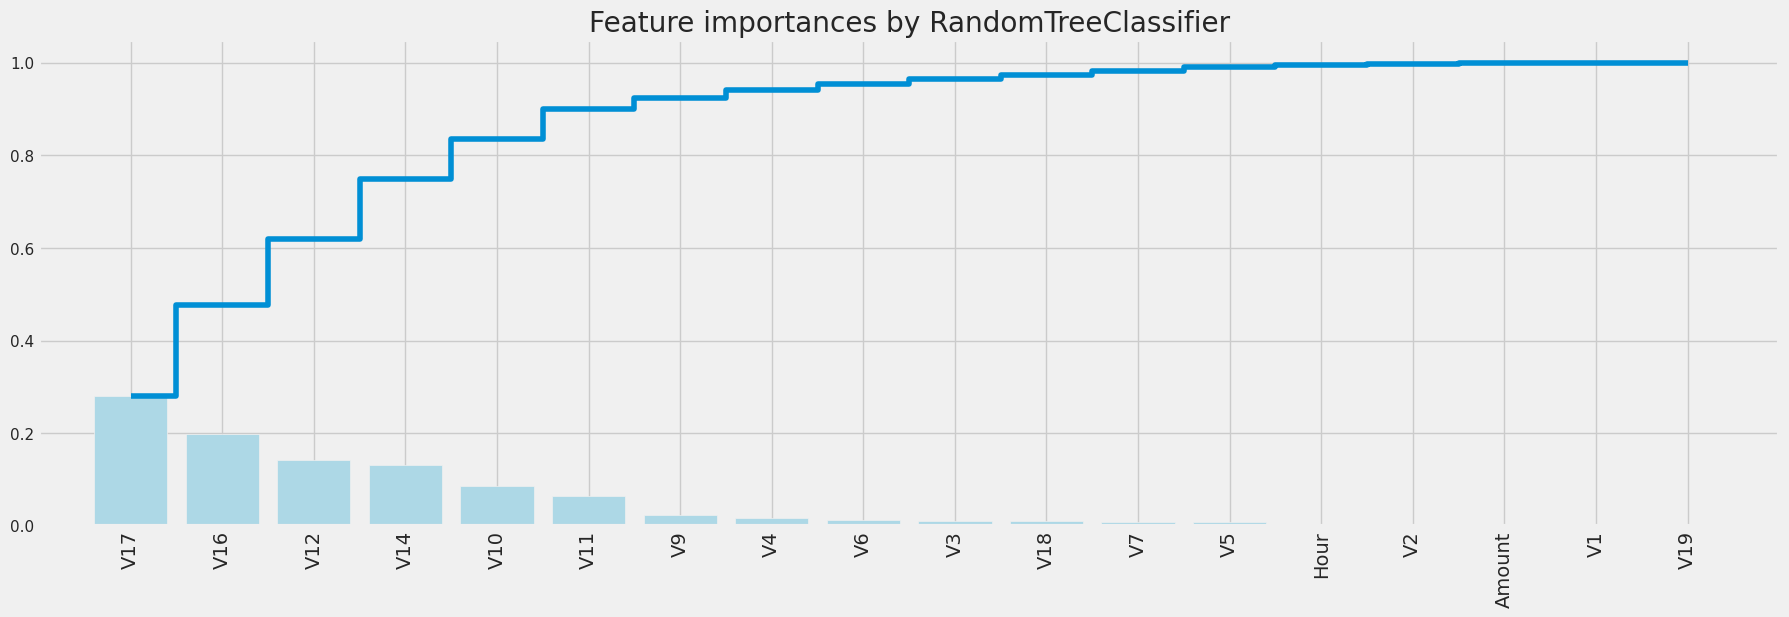

In [ ]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (12,6)

## feature importances ##
importances = clf.feature_importances_
feat_names = data_new[x_feature].columns
indices = np.argsort(importances)[::-1]
fig = plt.figure(figsize=(20,6))
plt.title("Feature importances by RandomTreeClassifier")

x = list(range(len(indices)))

plt.bar(x, importances[indices], color='lightblue',  align="center")
plt.step(x, np.cumsum(importances[indices]), where='mid', label='Cumulative')
plt.xticks(x, feat_names[indices], rotation='vertical',fontsize=14)
plt.xlim([-1, len(indices)])


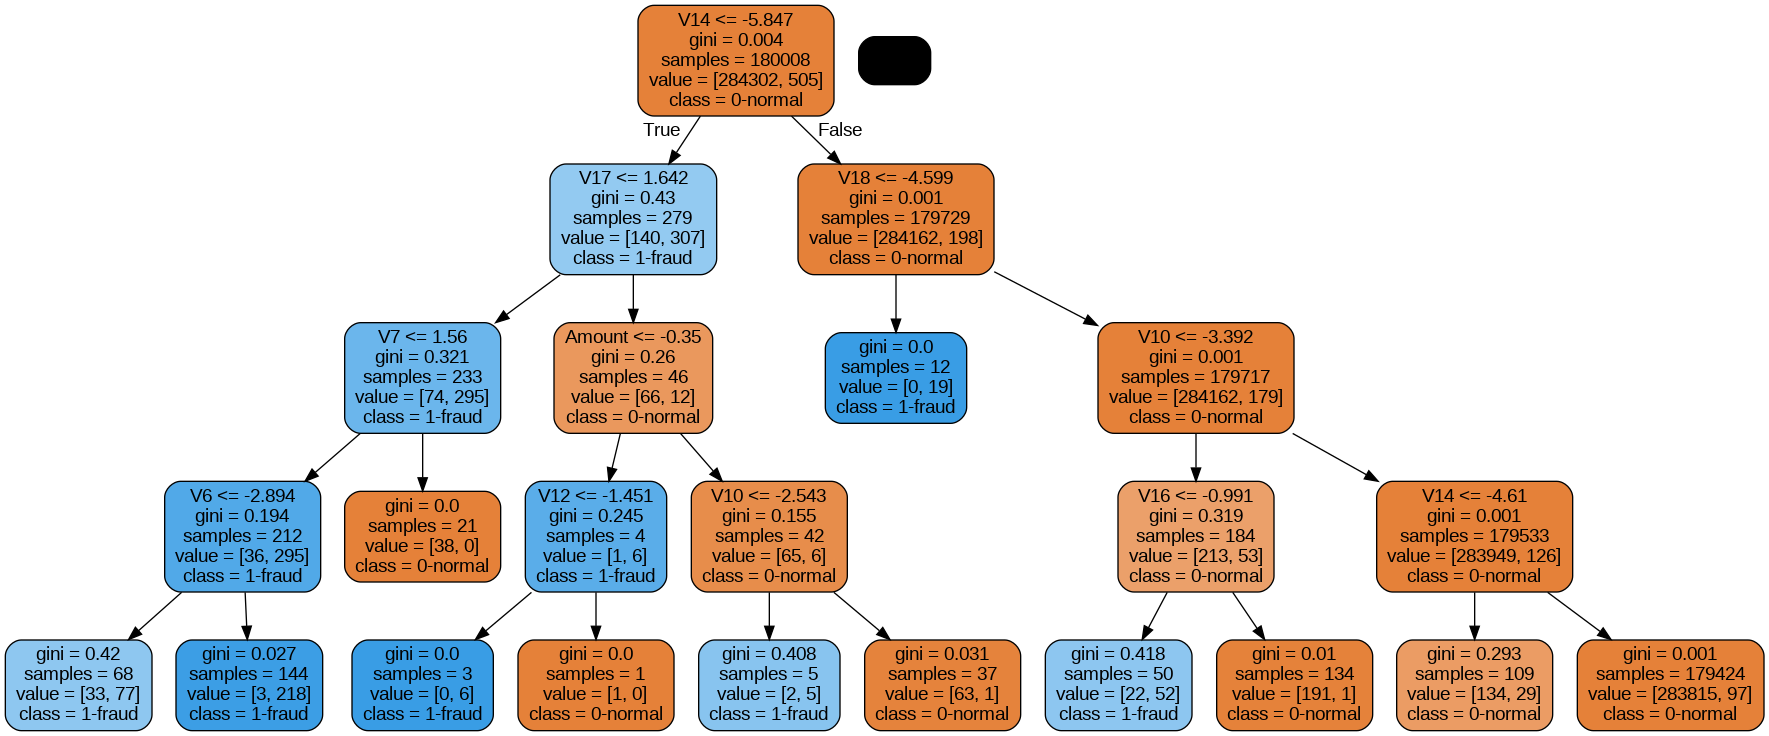

In [ ]:
from sklearn import tree
estimator = clf.estimators_[5]

import pydotplus
from IPython.display import display, Image

import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

dot_data = tree.export_graphviz(estimator,
                                out_file=None,
                                feature_names=x_feature,
                                class_names = ['0-normal', '1-fraud'],
                                filled = True,
                                rounded =True
                               )
graph = pydotplus.graph_from_dot_data(dot_data)
display(Image(graph.create_png()))


In [ ]:
# Lets shuffle the data before creating the subsamples
df = data_new.sample(frac=1)
# amount of fraud classes 492 rows.
fraud = df.loc[df['Class'] == 1]
non_fraud = df.loc[df['Class'] == 0][:492]

normal_distributed = pd.concat([fraud, non_fraud])

# Shuffle dataframe rows
new = normal_distributed.sample(frac=1, random_state=42)
print(new.shape)
new.head()


(984, 19)


,V1,V2,V3,V4,V5,V6,V7,V9,V10,V11,V12,V14,V16,V17,V18,V19,Amount,Class,Hour
44902,1.4174,-1.2696,0.5497,-1.3831,-1.6508,-0.5021,-1.1736,-1.5897,1.3959,-0.9355,-0.9940,-0.5419,-0.0036,0.1867,0.4641,-0.2743,-0.0638,0,-1.1260
79883,-1.3228,1.5528,-2.2769,2.9921,-1.9471,-0.4803,-1.3624,-2.3296,-3.3936,3.1284,-3.5704,-3.9884,-2.8438,-4.8262,-0.7039,2.1522,0.7263,1,-0.7467
225801,1.9808,0.1926,-1.7109,0.5562,0.2399,-1.4828,0.4253,0.3677,-0.5327,-0.0950,0.8346,-1.0058,0.1375,0.3187,0.3281,-0.4584,-0.1803,0,1.0735
88876,1.1409,1.2213,-1.4530,2.0676,0.8547,-0.9812,0.3257,0.1132,-2.1270,0.9159,-0.4686,-4.8619,0.8664,4.0825,1.1963,-1.1008,-0.3492,1,-0.6709
16415,0.2880,0.9657,-1.4595,1.9219,-1.9124,-1.1303,-2.8143,-0.6953,-3.4657,2.3516,-3.8267,-4.8529,-2.6174,-4.8356,-1.9218,-0.3859,-0.2598,1,-1.4293


In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)
sm = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from scipy.stats import uniform, randint

param_distributions = {
    'Logistic Regression': {'C': uniform(0.01, 10), 'penalty': ['l2']},
    'Random Forest': {'n_estimators': randint(50, 200), 'max_depth': randint(3, 15), 'min_samples_split': randint(2, 10)},
    'XGBoost': {'learning_rate': uniform(0.01, 0.2), 'n_estimators': randint(50, 200), 'max_depth': randint(3, 7)}
}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Define the models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier()
}

# Define parameter distributions for RandomizedSearchCV
param_distributions = {
    'Logistic Regression': {
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'solver': ['newton-cg', 'lbfgs', 'liblinear']
    },
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'XGBoost': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 6, 9],
        'subsample': [0.8, 0.9, 1.0],
        'colsample_bytree': [0.8, 0.9, 1.0]
    }
}

# Store optimized models
optimized_models = {}

for name, model in models.items():
    print(f"Optimizing {name}...")

    # Setup RandomizedSearchCV
    random_search = RandomizedSearchCV(
        estimator=model,
        param_distributions=param_distributions[name],
        n_iter=5,  # Reduced number of parameter combinations
        scoring='roc_auc',
        cv=3,  # Use fewer folds
        n_jobs=-1,  # Utilize all available cores
        random_state=42
    )

    # Fit RandomizedSearchCV on the data
    random_search.fit(X_train_resampled, y_train_resampled)

    # Store the best model
    optimized_models[name] = random_search.best_estimator_
    print(f"Best parameters for {name}: {random_search.best_params_}")

print("All models have been optimized.")


Optimizing Logistic Regression...
Best parameters for Logistic Regression: {'solver': 'newton-cg', 'C': 0.01}
Optimizing Random Forest...
Best parameters for Random Forest: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 30}
Optimizing XGBoost...
Best parameters for XGBoost: {'subsample': 0.9, 'n_estimators': 100, 'max_depth': 9, 'learning_rate': 0.2, 'colsample_bytree': 1.0}
All models have been optimized.


In [ ]:
pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.4 MB/s eta 0:00:00


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
import keras_tuner as kt

# 1. Prepare Data
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)
sm = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)

# 2. Define Model Building Function
def build_model(hp):
    model = Sequential()
    model.add(Dense(units=hp.Int('units_1', min_value=64, max_value=256, step=64),
                    activation='relu',
                    input_shape=(X_train_resampled.shape[1],)))
    model.add(Dropout(rate=hp.Float('dropout_1', min_value=0.0, max_value=0.3, step=0.1)))

    model.add(Dense(units=hp.Int('units_2', min_value=64, max_value=256, step=64),
                    activation='relu'))
    model.add(Dropout(rate=hp.Float('dropout_2', min_value=0.0, max_value=0.3, step=0.1)))

    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer=Adam(learning_rate=hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='LOG')),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model

# 3. Initialize Keras Tuner
tuner = kt.RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=3,  # Reduced number of trials
    executions_per_trial=1,  # Reduced number of executions per trial
    directory='my_dir',
    project_name='hyperparam_tuning'
)

# 4. Define Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# 5. Run Hyperparameter Search
tuner.search(X_train_resampled, y_train_resampled,
             epochs=50,  # Reduced number of epochs
             batch_size=64,  # Increased batch size
             validation_split=0.2,
             callbacks=[early_stopping],
             verbose=1)

# 6. Get Best Model
best_model = tuner.get_best_models(num_models=1)[0]

# 7. Get Deep Learning Model Predictions
train_predictions = best_model.predict(X_train_resampled).flatten()
test_predictions = best_model.predict(X_test).flatten()

# 8. Print Predictions
print("Training set predictions:")
print(train_predictions[:10])  # Print first 10 prediction probabilities

print("\nTest set predictions:")
print(test_predictions[:10])  # Print first 10 prediction probabilities

# 9. Print Deep Learning Model Performance Metrics
y_train_pred_dl = (train_predictions > 0.5).astype(int)
y_test_pred_dl = (test_predictions > 0.5).astype(int)

print("\nPerformance on Training Set:")
print(f"Accuracy: {accuracy_score(y_train_resampled, y_train_pred_dl)}")
print(f"Precision: {precision_score(y_train_resampled, y_train_pred_dl)}")
print(f"Recall: {recall_score(y_train_resampled, y_train_pred_dl)}")
print(f"F1 Score: {f1_score(y_train_resampled, y_train_pred_dl)}")
print(f"ROC AUC: {roc_auc_score(y_train_resampled, train_predictions)}")

print("\nPerformance on Test Set:")
print(f"Accuracy: {accuracy_score(y_test, y_test_pred_dl)}")
print(f"Precision: {precision_score(y_test, y_test_pred_dl)}")
print(f"Recall: {recall_score(y_test, y_test_pred_dl)}")
print(f"F1 Score: {f1_score(y_test, y_test_pred_dl)}")
print(f"ROC AUC: {roc_auc_score(y_test, test_predictions)}")


Trial 3 Complete [00h 02m 18s]
val_loss: 0.06798554956912994

Best val_loss So Far: 0.06798554956912994
Total elapsed time: 00h 14m 08s
12439/12439 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step
2671/2671 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
Training set predictions:
[0.09925198 0.25854138 0.15763873 0.03552195 0.03552195 0.03552195
 0.09127334 0.08605739 0.39268845 0.03552195]

Test set predictions:
[0.10404907 0.2105814  0.13537323 0.03552195 0.01751502 0.03552195
 0.23534365 0.03832003 0.06885953 0.03552195]

Performance on Training Set:
Accuracy: 0.9729399055371319
Precision: 0.978603208501767
Recall: 0.9670234147321877
F1 Score: 0.9727788518644882
ROC AUC: 0.9950277097780128

Performance on Test Set:
Accuracy: 0.9774118418126705
Precision: 0.059782608695652176
Recall: 0.8175675675675675
F1 Score: 0.11141804788213627
ROC AUC: 0.940199593461801



Performance of Logistic Regression:
Performance on Training Set:
Accuracy: 0.9815897899708572
Precision: 0.9915834931837065
Recall: 0.9714249824138278
F1 Score: 0.9814007319908424
ROC AUC: 0.9985268621819219

Performance on Test Set:
Accuracy: 0.9912690331566073
Precision: 0.14823529411764705
Recall: 0.8513513513513513
F1 Score: 0.2525050100200401
ROC AUC: 0.9667986938811723


<Figure size 1200x600 with 0 Axes>

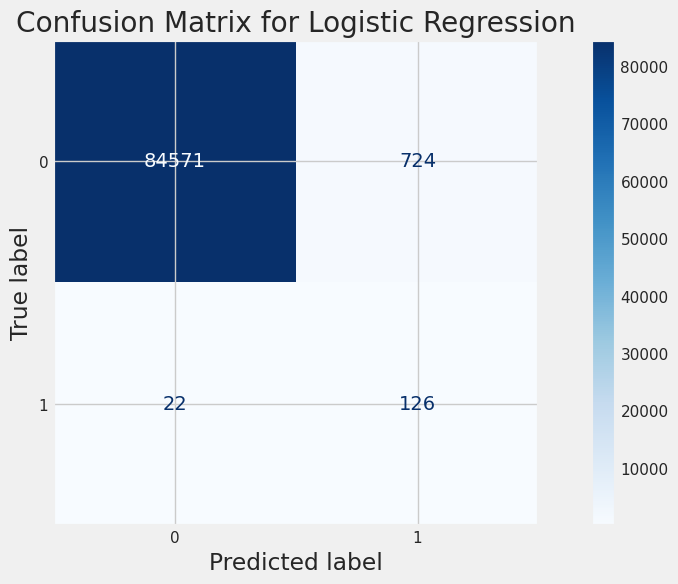

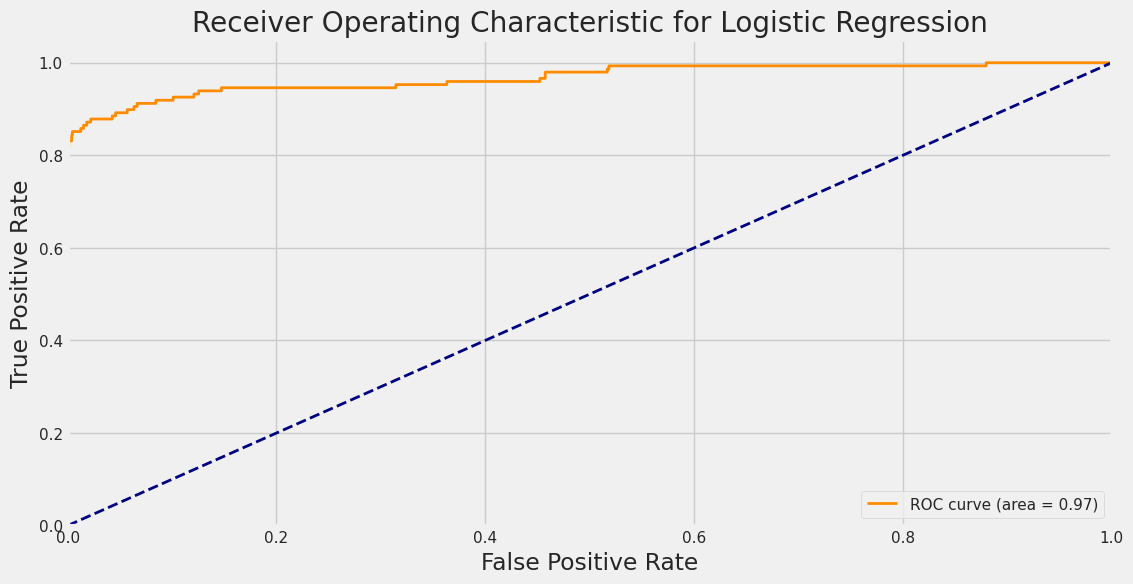

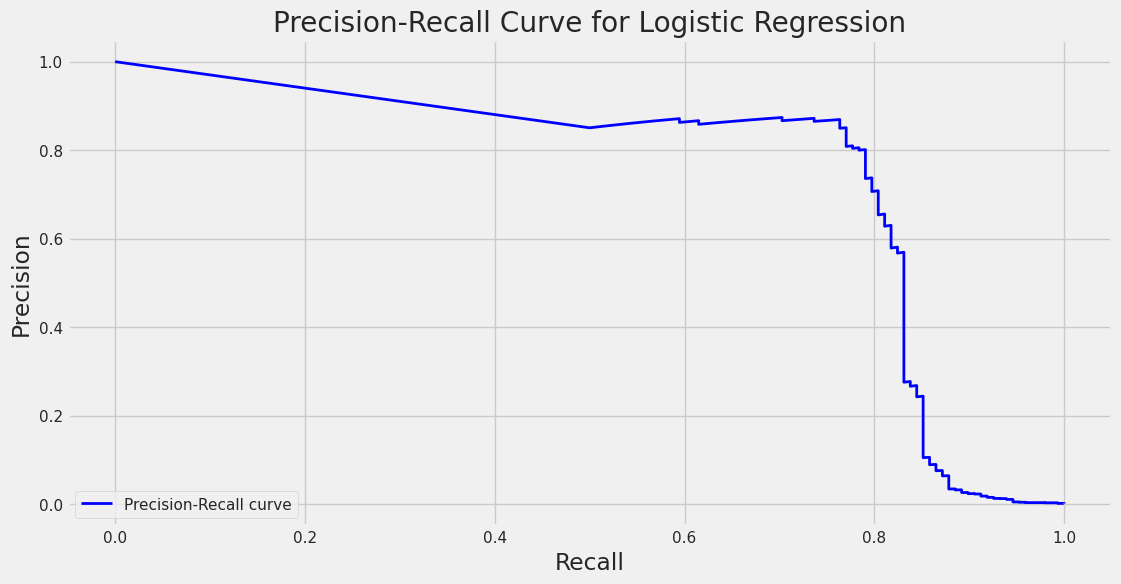

Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     85295
           1       0.15      0.85      0.25       148

    accuracy                           0.99     85443
   macro avg       0.57      0.92      0.62     85443
weighted avg       1.00      0.99      0.99     85443


Performance of Random Forest:
Performance on Training Set:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
ROC AUC: 1.0

Performance on Test Set:
Accuracy: 0.9994850368081645
Precision: 0.8939393939393939
Recall: 0.7972972972972973
F1 Score: 0.8428571428571429
ROC AUC: 0.9676426646471783


<Figure size 1200x600 with 0 Axes>

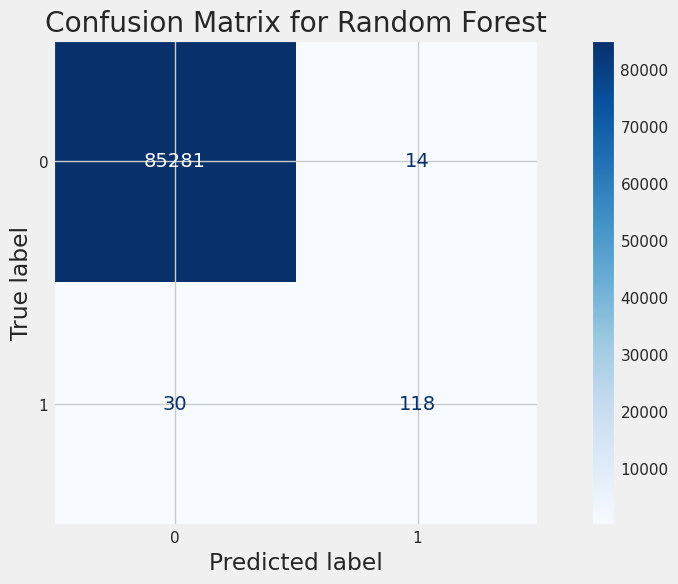

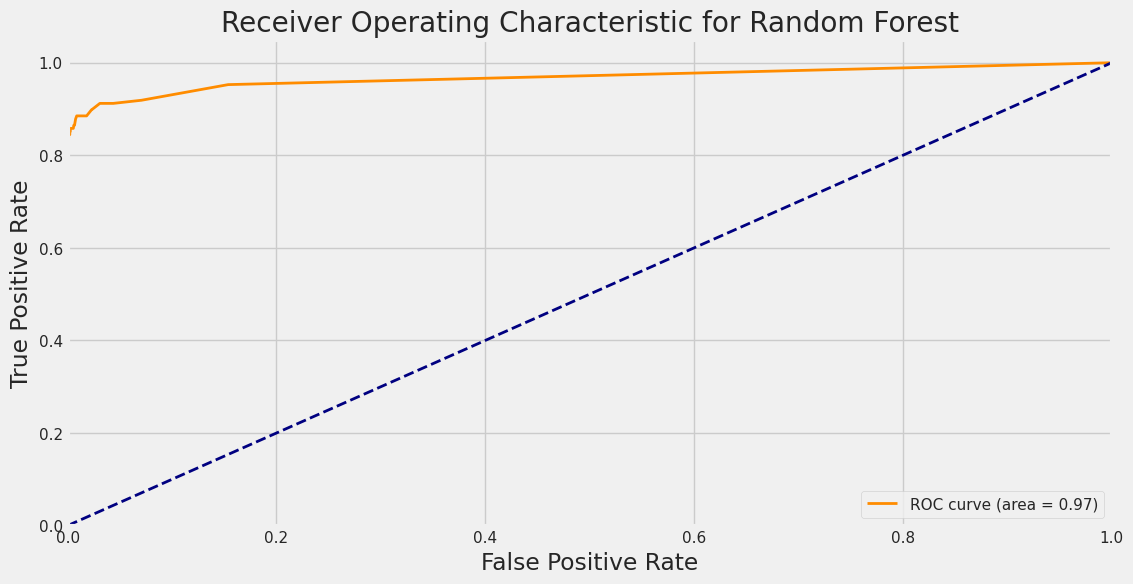

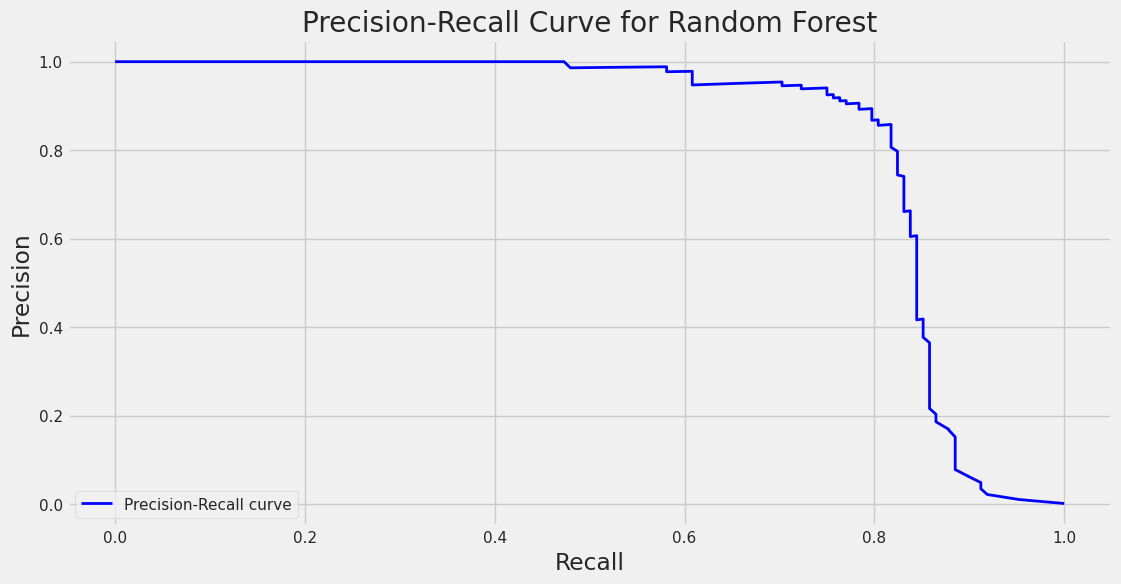

Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.89      0.80      0.84       148

    accuracy                           1.00     85443
   macro avg       0.95      0.90      0.92     85443
weighted avg       1.00      1.00      1.00     85443


Performance of XGBoost:
Performance on Training Set:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
ROC AUC: 1.0

Performance on Test Set:
Accuracy: 0.9993914071369217
Precision: 0.8287671232876712
Recall: 0.8175675675675675
F1 Score: 0.8231292517006803
ROC AUC: 0.972957208923561


<Figure size 1200x600 with 0 Axes>

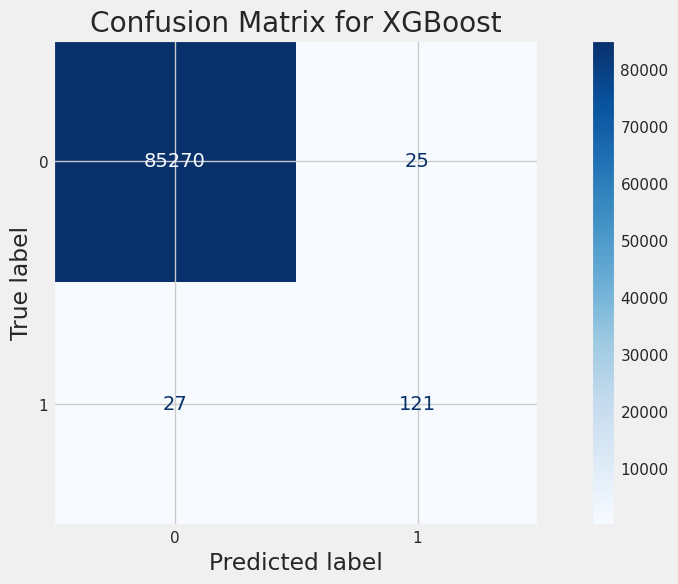

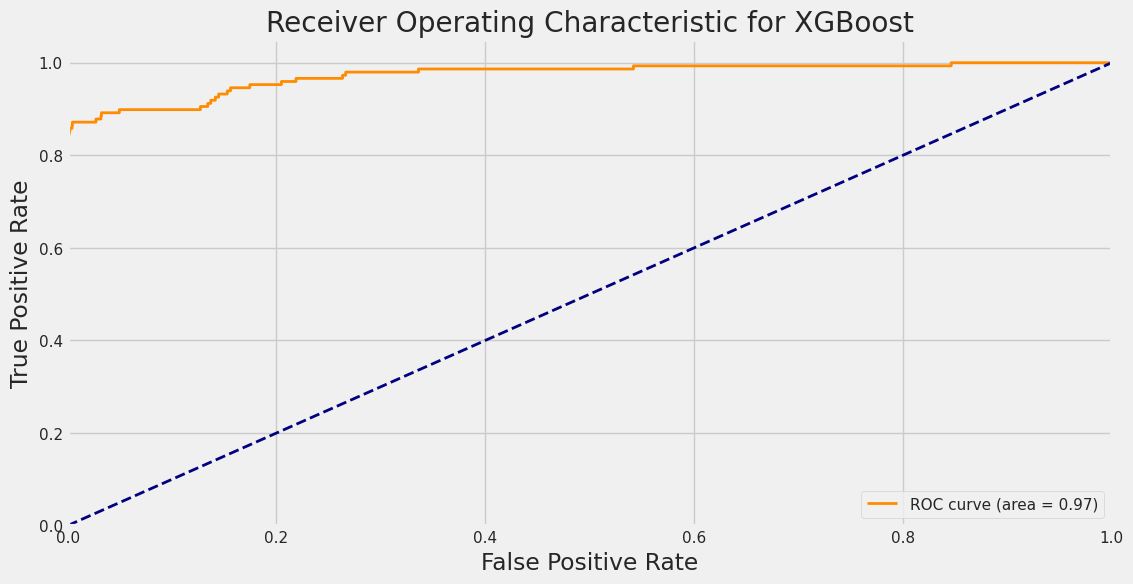

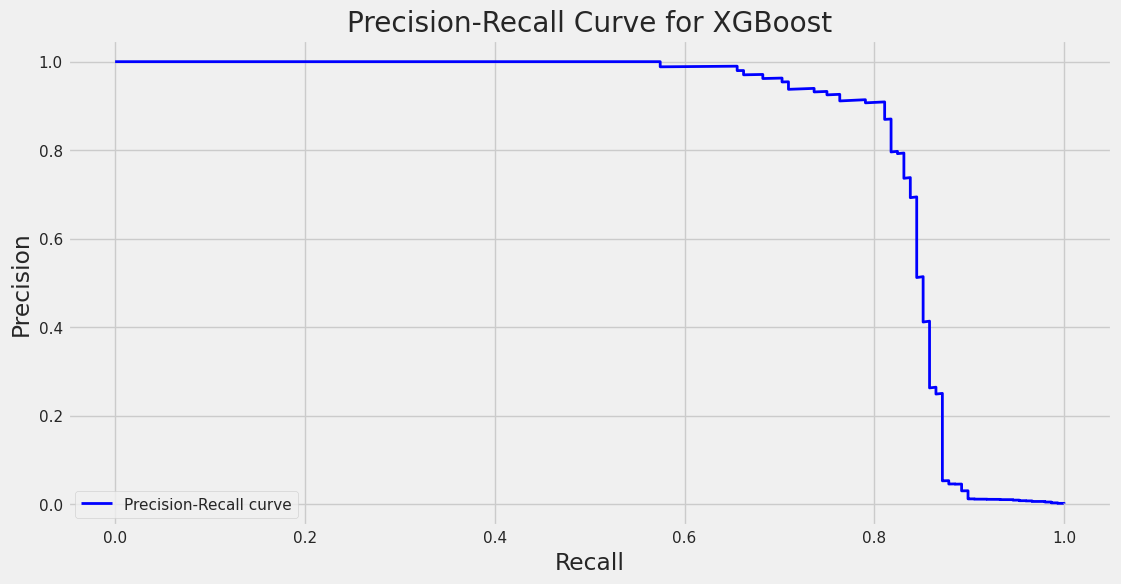

Classification Report for XGBoost:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.83      0.82      0.82       148

    accuracy                           1.00     85443
   macro avg       0.91      0.91      0.91     85443
weighted avg       1.00      1.00      1.00     85443



In [ ]:
from sklearn.metrics import roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, precision_recall_curve, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Assuming `optimized_models` is a dictionary of models you want to evaluate
# and `X_train_resampled`, `y_train_resampled`, `X_test`, `y_test` are your datasets

# Training and evaluating models
for name, model in optimized_models.items():
    # Train the model
    model.fit(X_train_resampled, y_train_resampled)

    # Predict on the test set
    y_pred_test = model.predict(X_test)
    y_prob_test = model.predict_proba(X_test)[:, 1]

    # Predict on the training set for comparison
    y_pred_train = model.predict(X_train_resampled)
    y_prob_train = model.predict_proba(X_train_resampled)[:, 1]

    # Compute metrics for the test set
    accuracy_test = accuracy_score(y_test, y_pred_test)
    precision_test = precision_score(y_test, y_pred_test)
    recall_test = recall_score(y_test, y_pred_test)
    f1_test = f1_score(y_test, y_pred_test)
    roc_auc_test = roc_auc_score(y_test, y_prob_test)

    # Compute metrics for the training set
    accuracy_train = accuracy_score(y_train_resampled, y_pred_train)
    precision_train = precision_score(y_train_resampled, y_pred_train)
    recall_train = recall_score(y_train_resampled, y_pred_train)
    f1_train = f1_score(y_train_resampled, y_pred_train)
    roc_auc_train = roc_auc_score(y_train_resampled, y_prob_train)

    # Print performance metrics
    print(f"\nPerformance of {name}:")
    print(f"Performance on Training Set:")
    print(f"Accuracy: {accuracy_train}")
    print(f"Precision: {precision_train}")
    print(f"Recall: {recall_train}")
    print(f"F1 Score: {f1_train}")
    print(f"ROC AUC: {roc_auc_train}")

    print(f"\nPerformance on Test Set:")
    print(f"Accuracy: {accuracy_test}")
    print(f"Precision: {precision_test}")
    print(f"Recall: {recall_test}")
    print(f"F1 Score: {f1_test}")
    print(f"ROC AUC: {roc_auc_test}")

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred_test)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

    plt.figure()
    disp.plot(cmap='Blues')
    plt.title(f'Confusion Matrix for {name}')
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_prob_test)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic for {name}')
    plt.legend(loc="lower right")
    plt.show()

    # Precision-Recall Curve
    precision, recall, _ = precision_recall_curve(y_test, y_prob_test)

    plt.figure()
    plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve for {name}')
    plt.legend(loc="lower left")
    plt.show()

    # Print Classification Report
    print(f"Classification Report for {name}:\n", classification_report(y_test, y_pred_test))

In [ ]:
from sklearn.linear_model import LogisticRegression

# Predictive results of deep learning models
train_predictions_dl = best_model.predict(X_train_resampled).flatten()
test_predictions_dl = best_model.predict(X_test).flatten()

# Predictions from other machine learning models
train_predictions_ml = []
test_predictions_ml = []

for name, model in optimized_models.items():
    train_pred = model.predict_proba(X_train_resampled)[:, 1]
    test_pred = model.predict_proba(X_test)[:, 1]
    train_predictions_ml.append(train_pred)
    test_predictions_ml.append(test_pred)

# Combining predictions into meta-features
X_train_meta = np.column_stack(train_predictions_ml + [train_predictions_dl])
X_test_meta = np.column_stack(test_predictions_ml + [test_predictions_dl])

# training meta-model
meta_model = LogisticRegression()
meta_model.fit(X_train_meta, y_train_resampled)

12439/12439 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step
2671/2671 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


LogisticRegression()

In [ ]:
from sklearn.linear_model import LogisticRegression

# Training Metamodel
meta_model = LogisticRegression()
meta_model.fit(X_train_meta, y_train_resampled)


LogisticRegression()


Performance on Training Set:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
ROC AUC: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199020
           1       1.00      1.00      1.00    199020

    accuracy                           1.00    398040
   macro avg       1.00      1.00      1.00    398040
weighted avg       1.00      1.00      1.00    398040


Confusion Matrix:
[[199020      0]
 [     0 199020]]


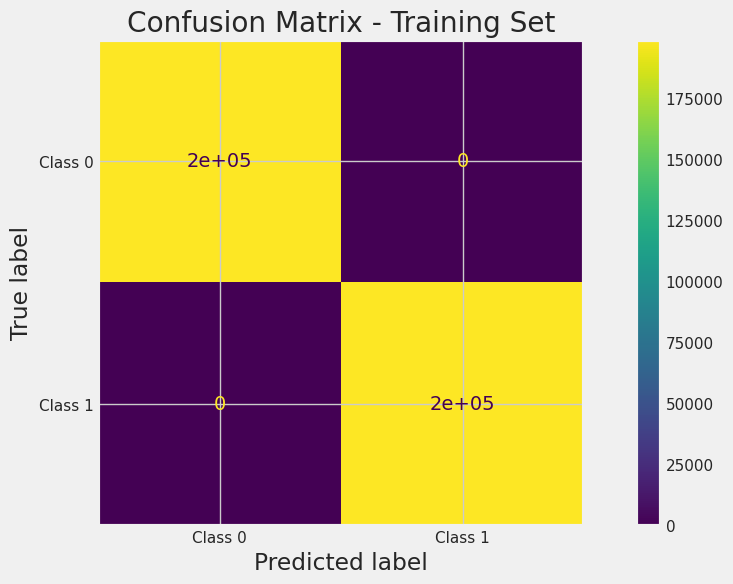

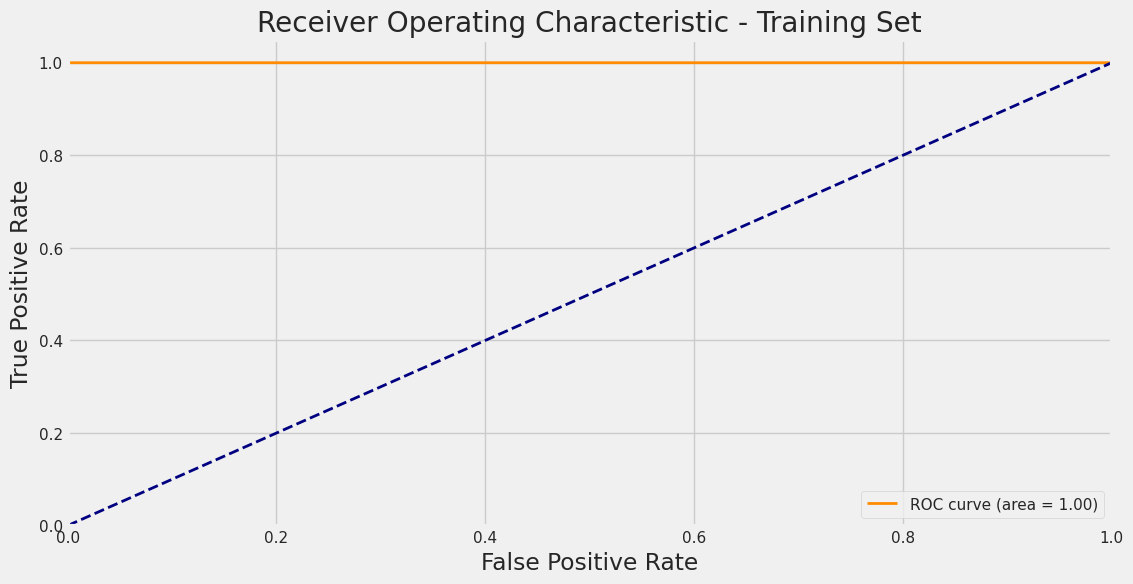

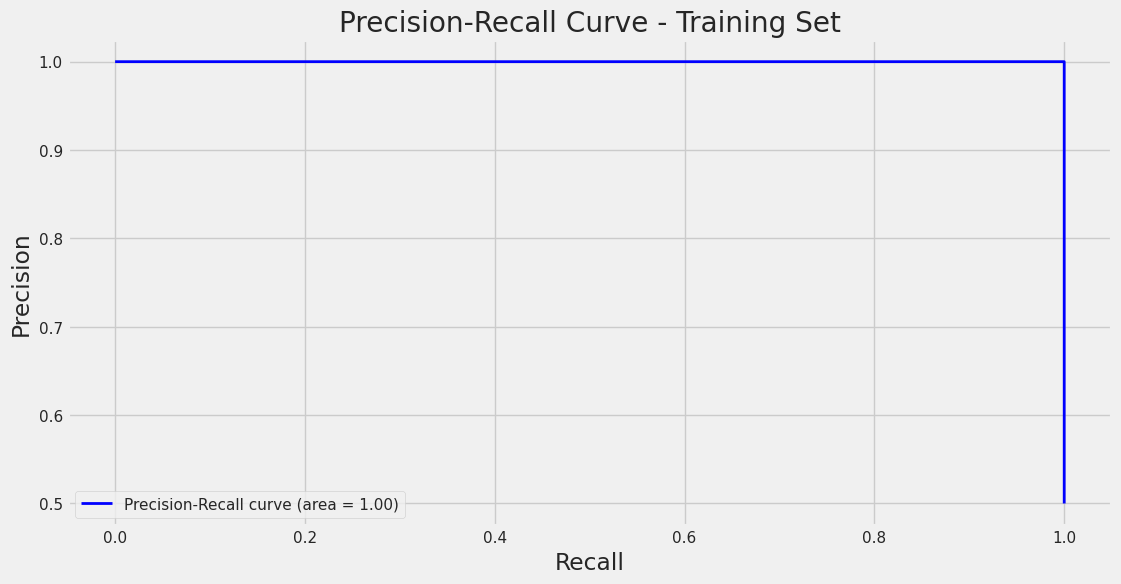


Performance on Test Set:
Accuracy: 0.9993914071369217
Precision: 0.8287671232876712
Recall: 0.8175675675675675
F1 Score: 0.8231292517006803
ROC AUC: 0.9739726830412099

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.83      0.82      0.82       148

    accuracy                           1.00     85443
   macro avg       0.91      0.91      0.91     85443
weighted avg       1.00      1.00      1.00     85443


Confusion Matrix:
[[85270    25]
 [   27   121]]


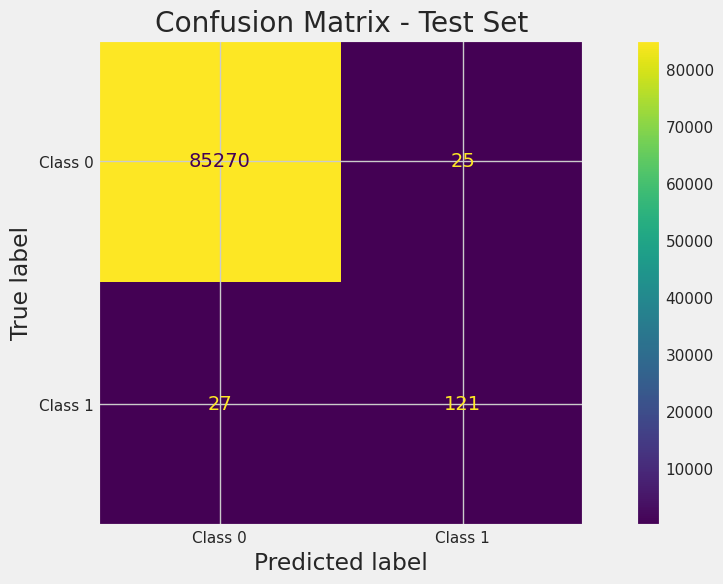

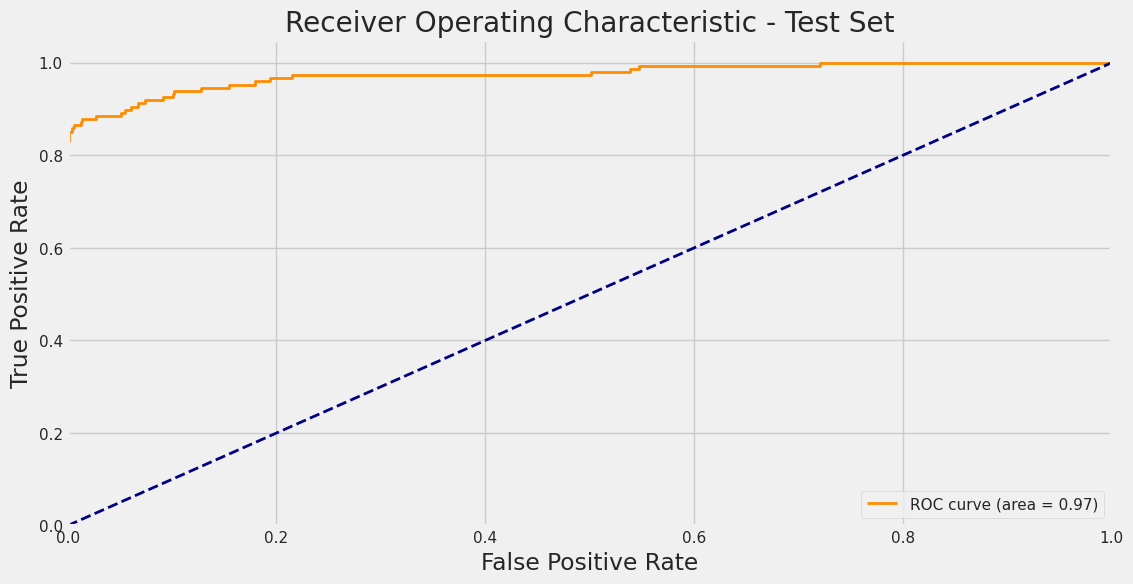

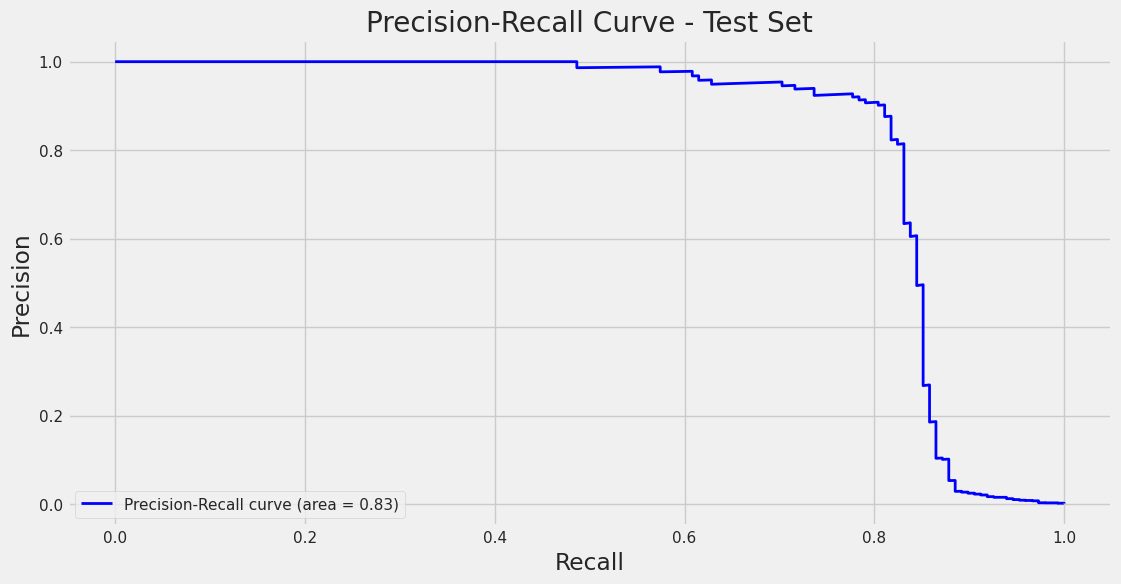

In [ ]:
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
                             confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve,
                             ConfusionMatrixDisplay)
import matplotlib.pyplot as plt
import numpy as np

# Get predicted probability
y_train_meta_pred_prob = meta_model.predict_proba(X_train_meta)[:, 1]
y_test_meta_pred_prob = meta_model.predict_proba(X_test_meta)[:, 1]

# Convert predicted probabilities to predicted categories
y_train_meta_pred = (y_train_meta_pred_prob > 0.5).astype(int)
y_test_meta_pred = (y_test_meta_pred_prob > 0.5).astype(int)

def print_metrics(y_true, y_pred, y_pred_prob, dataset_name="Dataset"):
    print(f"\nPerformance on {dataset_name}:")

    # Accuracy
    print(f"Accuracy: {accuracy_score(y_true, y_pred)}")

    # Precision
    print(f"Precision: {precision_score(y_true, y_pred)}")

    # Recall
    print(f"Recall: {recall_score(y_true, y_pred)}")

    # F1 Score
    print(f"F1 Score: {f1_score(y_true, y_pred)}")

    # ROC AUC
    print(f"ROC AUC: {roc_auc_score(y_true, y_pred_prob)}")

    # Classification Report
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    print("\nConfusion Matrix:")
    print(cm)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 0', 'Class 1'])
    disp.plot()
    plt.title(f"Confusion Matrix - {dataset_name}")
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_true, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic - {dataset_name}')
    plt.legend(loc='lower right')
    plt.show()

    # Precision-Recall Curve
    precision, recall, _ = precision_recall_curve(y_true, y_pred_prob)
    pr_auc = auc(recall, precision)
    plt.figure()
    plt.plot(recall, precision, color='blue', lw=2, label=f'Precision-Recall curve (area = {pr_auc:.2f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve - {dataset_name}')
    plt.legend(loc='lower left')
    plt.show()


print_metrics(y_train_resampled, y_train_meta_pred, y_train_meta_pred_prob, dataset_name="Training Set")

print_metrics(y_test, y_test_meta_pred, y_test_meta_pred_prob, dataset_name="Test Set")
